In [1]:
%matplotlib inline
import numpy as np 
import cv2 
import matplotlib.pyplot as plt
from libtiff import TIFF

In [9]:
def contrast_stretching(img_I):
    c = np.amin(img_I) # minimum pixel value occuring in image Input
    d = np.amax(img_I) # maximum pixel value occuring in image Input
    a = 0 # minimum pixel value allowed for an input image
    b = 255 # minimum pixel value allowed for an input image
    img_O = (img_I-c*np.ones(img_I.shape,np.uint8))*((b-a)/(d-c))+a 
    return (img_O)
    
# Show image
def show_img(img):
    fig = plt.figure(figsize=(8, 6), dpi= 80, facecolor='w', edgecolor='k')
    img_plot = plt.imshow(img.astype('uint8'))
    plt.show()
    
def img_sharpening(img_I,N):
    cs_img_I = contrast_stretching(img_I)
    img_L = cv2.GaussianBlur(cs_img_I,(N,N),sigmaX=SIGMA,sigmaY=SIGMA)
    imgH = np.zeros(cs_img_I.shape,np.uint8)
    img_H = cs_img_I - img_L
    img_O = cs_img_I + A*img_H 
    return (contrast_stretching(img_O))

In [3]:
import os 
os.chdir("/Users/minruilu/Desktop/OneDrive - UNSW/UNSW/2020 Semester 2/comp9517/project/COMP9517 20T2 Group Project Image Sequences/DIC-C2DH-HeLa/segmentations_tif/SEG/seq1")

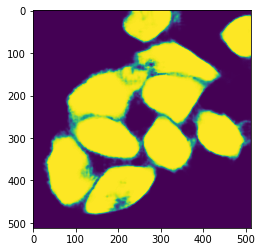

In [16]:
img = cv2.imread("seg_Sequence 1_t006.tif",0)
plt.imshow(img)

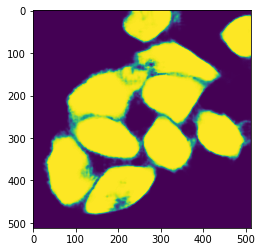

In [17]:
image = contrast_stretching(img)
image = cv2.normalize(image,None,0,255,norm_type=cv2.NORM_MINMAX)
plt.imshow(image)

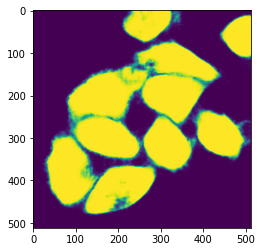

In [26]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)) 
res = cv2.morphologyEx(image,cv2.MORPH_OPEN,kernel)
plt.imshow(res)

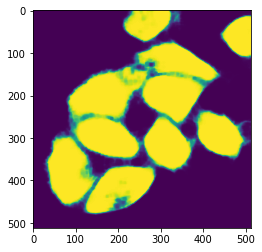

In [18]:
image_d = cv2.dilate(image, np.ones((3,3), np.uint8))
image_e = cv2.erode(image_d, np.ones((5,5), np.uint8)) 
# image_d = cv2.dilate(image, np.ones((11,11), np.uint8))
plt.imshow(image_e)

## Try with SKIMAGE

In [27]:
import numpy as np 
import skimage.morphology, skimage.data

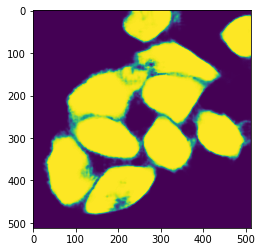

In [28]:
img = skimage.data.imread("seg_Sequence 1_t006.tif",1)
plt.imshow(img)

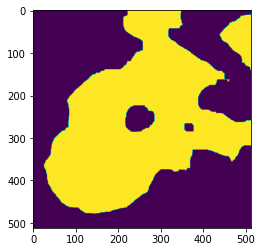

In [34]:
img = skimage.data.imread("seg_Sequence 1_t006.tif",1)
image_d = cv2.dilate(img, np.ones((3,3), np.uint8))
image_e = cv2.erode(image_d, np.ones((15,15), np.uint8))
labels = skimage.morphology.label(image_e)
labelCount = np.bincount(labels.ravel())
background = np.argmax(labelCount)
image_e[labels!=background] = 255 
plt.imshow(image_e)

## Try with Floodfill

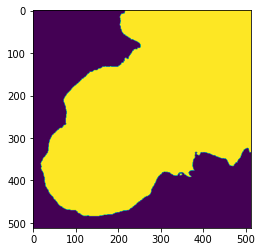

In [35]:
def fillhole(im_in):
    im_floodfill = im_in.copy() 
    h,w = im_in.shape[:2]
    mask = np.zeros((h+2,w+2),np.uint8)
    cv2.floodFill(im_floodfill,mask,(0,0),255)
    im_floodfill_inv = cv2.bitwise_not(im_floodfill)
    im_out = im_in | im_floodfill_inv 
    return (im_out)
plt.imshow(fillhole(img))

## Sharpening

In [11]:
SIGMA = 1.0 
A = 1.25

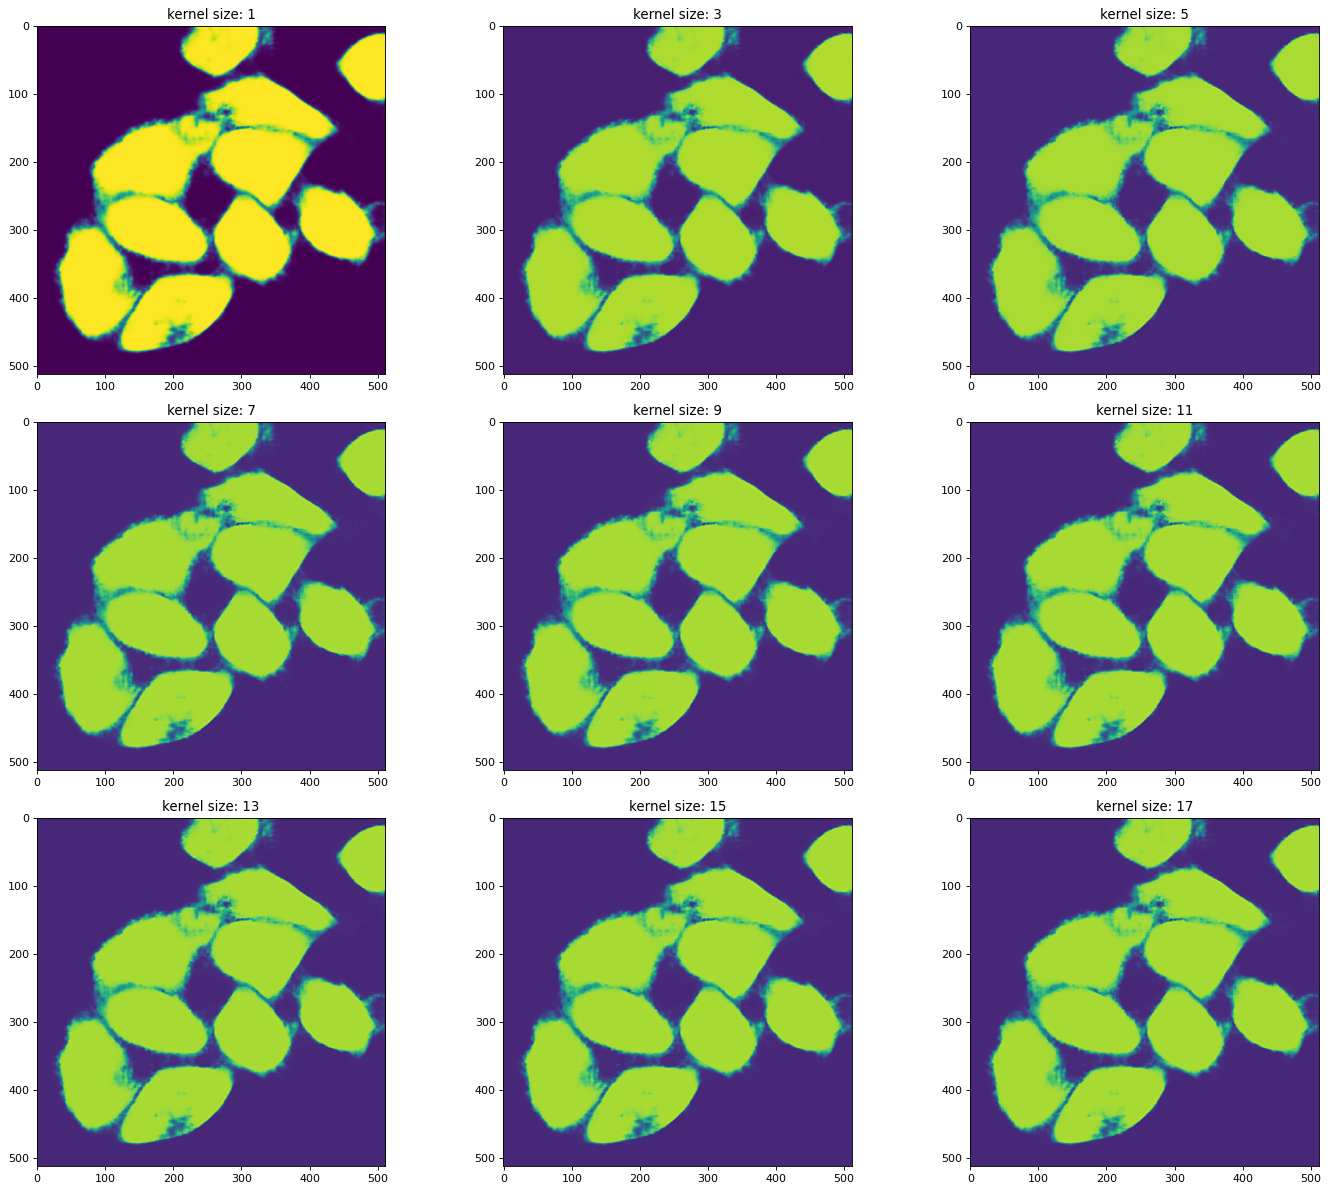

In [37]:
rows = 3
cols = 3
fig = plt.figure(figsize=(18, 15), dpi= 80, facecolor='w', edgecolor='k')
axes = []
for i in range(1,rows*cols*2,2):
    axes.append(fig.add_subplot(rows,cols,(i+1)//2))
    subplot_title = ("kernel size: "+str(i))
    axes[-1].set_title(subplot_title)
    plt.imshow(img_sharpening(image,i).astype('uint8'))
fig.tight_layout()
plt.show()

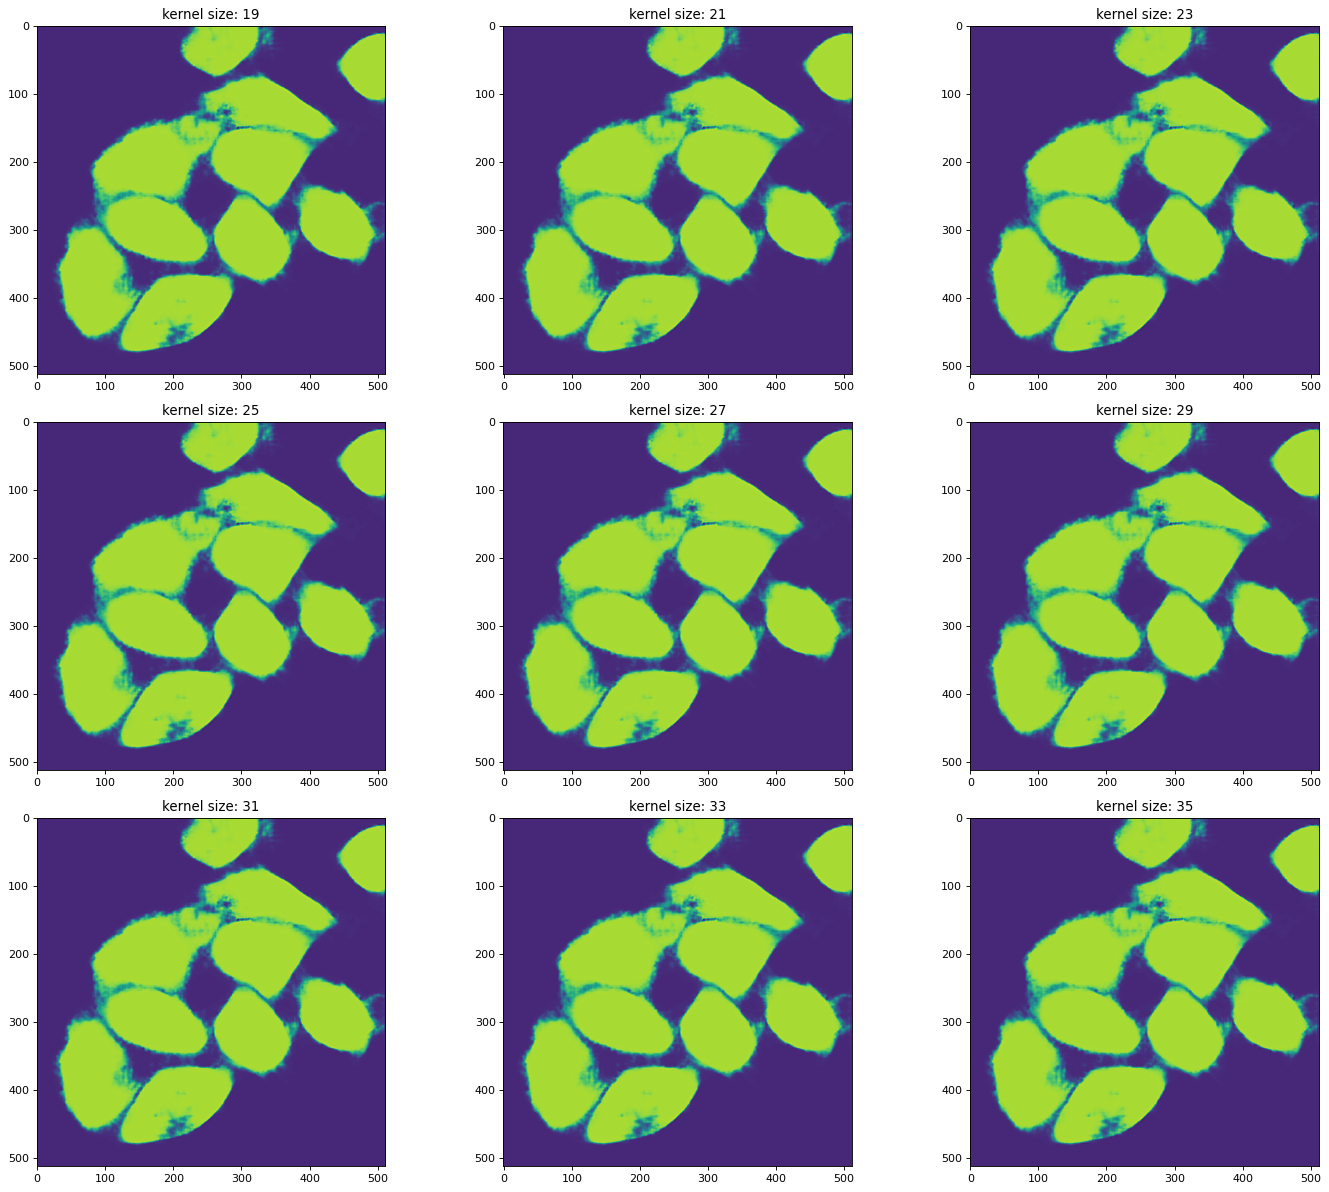

In [40]:
rows = 3
cols = 3
fig = plt.figure(figsize=(18, 15), dpi= 80, facecolor='w', edgecolor='k')
axes = []
for i in range(19,19+rows*cols*2,2):
    axes.append(fig.add_subplot(rows,cols,(i+1-18)//2))
    subplot_title = ("kernel size: "+str(i))
    axes[-1].set_title(subplot_title)
    plt.imshow(img_sharpening(image,i).astype('uint8'))
fig.tight_layout()
plt.show()

In [41]:
cv2.imwrite("out.tif",img_sharpening(image,19).astype('uint8'))

True